In [1]:
#pip install geopandas
#pip install fiona shapely

In [2]:
'''
import pandas as pd

# tulostusasetukset niin, että kaikki rivit ja sarakkeet näkyvät

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
'''

"\nimport pandas as pd\n\n# tulostusasetukset niin, että kaikki rivit ja sarakkeet näkyvät\n\npd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)\npd.set_option('display.width', None)\npd.set_option('display.max_colwidth', None)\n"

Haetaan shapefile joen keskiviivasta ja juoluoista

In [3]:
import geopandas as gpd

# Shapefile joen keskiviiva
joen_keskiviiva = gpd.read_file(r'C:\Users\oonao\Documents\lipasto\5_vuosi\gradu\gis\joki_centerline2.shp')

print(joen_keskiviiva)

#Shapefile juolua keskiviivat
juoluat = gpd.read_file(r'C:\Users\oonao\Documents\lipasto\5_vuosi\gradu\gis\juoluat_centerline.shp')

print(juoluat)


   FID_  FID_joki_S    SHAPE_Leng  InLine_FID   
0     1           0  32602.237884           1  \

                                            geometry  
0  LINESTRING (621674.249 7352638.194, 621677.197...  
   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry  
0  LINESTRING (612586.295 7359035.916, 612586.060...  
1  LINESTRING (616117.848 7356152.986, 616117.856...  
2  LINESTRING (609843.254 7360357.923, 609842.670...  
3  LINESTRING (609203.291 7361123.482, 609201.240...  


In [4]:
import numpy as np
#juoluoiden iät määritys
juoluat['age']=np.nan

juoluat['age'].iloc[0] = np.random.randint(2500,2800)
juoluat['age'].iloc[1] = np.random.randint(2000,2500)
juoluat['age'].iloc[2] = np.random.randint(3000,4000)
juoluat['age'].iloc[3] = np.random.randint(3000,3500)

print(juoluat)



   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age  
0  LINESTRING (612586.295 7359035.916, 612586.060...  2651.0  
1  LINESTRING (616117.848 7356152.986, 616117.856...  2147.0  
2  LINESTRING (609843.254 7360357.923, 609842.670...  3184.0  
3  LINESTRING (609203.291 7361123.482, 609201.240...  3272.0  


C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\308178808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juoluat['age'].iloc[0] = np.random.randint(2500,2800)
C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\308178808.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juoluat['age'].iloc[1] = np.random.randint(2000,2500)
C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\308178808.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Plotataan joki, juoluat ja koordinaatit

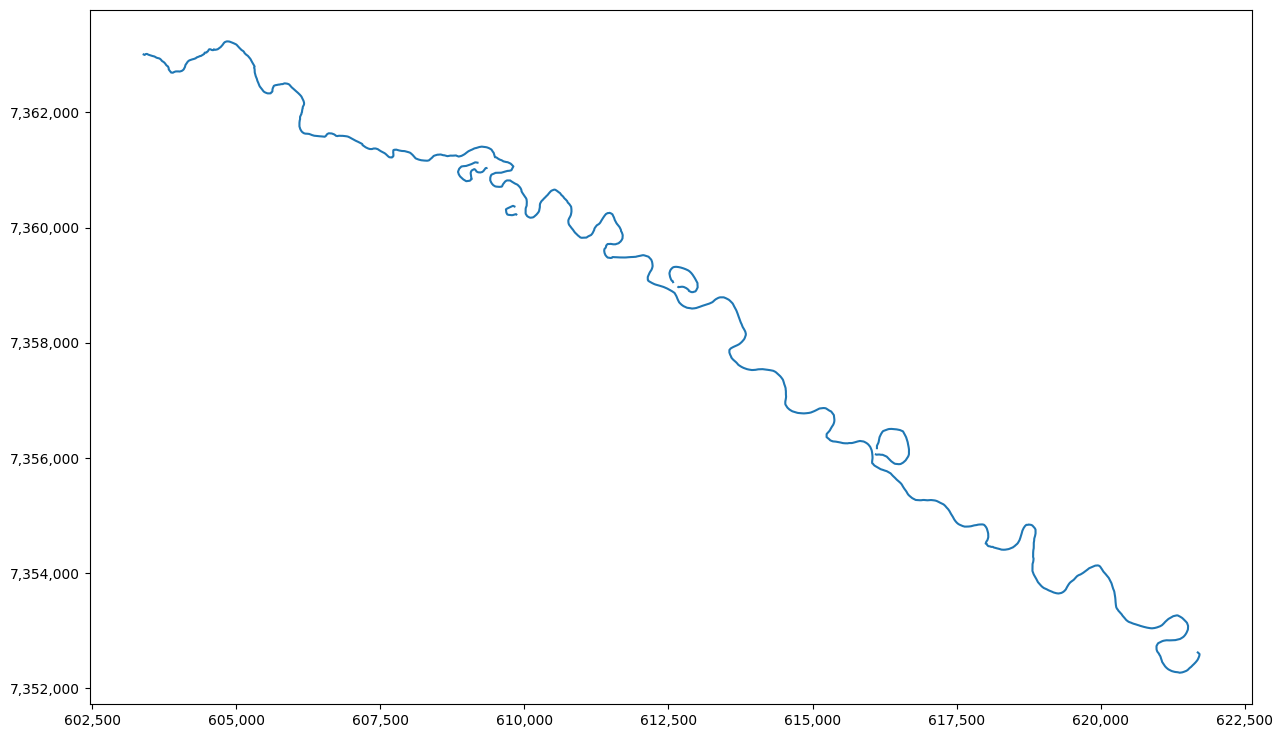

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Kuvakoko
fig, ax = plt.subplots(figsize=(15, 10))

# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

# Joen plottaus
joen_keskiviiva.plot(ax=ax)
# Juoluoiden plottaus
juoluat.plot(ax=ax)


plt.show()

Etsitään juoluoiden päätepisteet

In [6]:
from shapely.geometry import Point

def oxbow_endpoints(juoluat):
# Create empty lists to store start and end points
    startpoints = []
    endpoints = []

    # Iterate through each row of the GeoDataFrame
    for index, row in juoluat.iterrows():
        # Extract start and end points from LineString geometry
        start_point = Point(row['geometry'].coords[0])
        end_point = Point(row['geometry'].coords[-1])
        
        # Append start and end points to the respective lists
        startpoints.append(start_point)
        endpoints.append(end_point)

    # Add lists as new columns to the GeoDataFrame
    juoluat['startpoint'] = startpoints
    juoluat['endpoint'] = endpoints

oxbow_endpoints(juoluat)

print(juoluat)


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060...  2651.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856...  2147.0   
2  LINESTRING (609843.254 7360357.923, 609842.670...  3184.0   
3  LINESTRING (609203.291 7361123.482, 609201.240...  3272.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint  
0  POINT (612656.4088000003 7358979.316599999)  
1  POINT (616081.9561000001 7356069.018199999)  
2  POINT (609871.2938000001 7360213.739300001)  
3       POINT (609358.5363999996 7361038.5878)

Plotataan juoluoiden päätepisteet

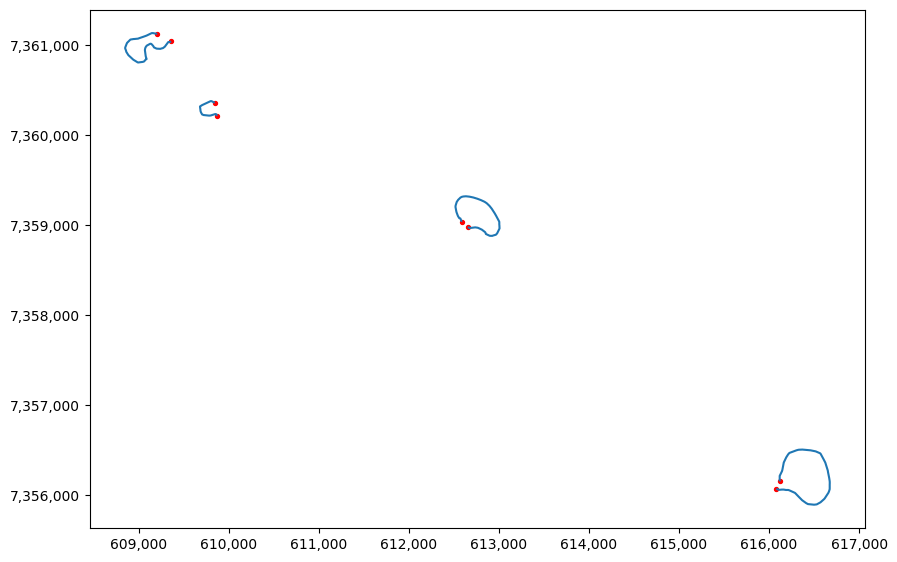

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Kuvakoko
fig, ax = plt.subplots(figsize=(10, 7))

# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

# Juoluoiden plottaus
juoluat.plot(ax=ax)
gpd.GeoDataFrame(geometry=juoluat['startpoint']).plot(ax=ax, color='red', markersize=8)
gpd.GeoDataFrame(geometry=juoluat['endpoint']).plot(ax=ax, color='red', markersize=8)

plt.show()
 

Jaetaan joki pisteisiin. 

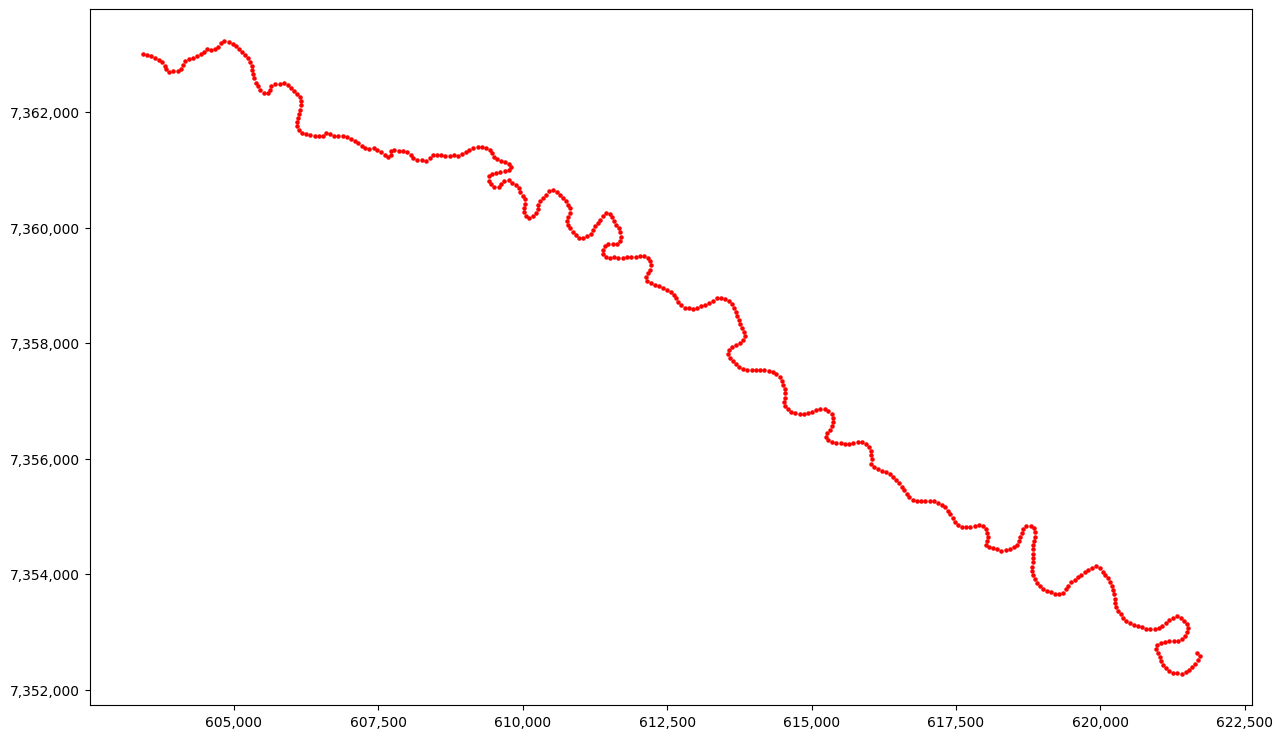

In [8]:
from shapely.geometry import LineString

# Kuvakoko, kaksi kuvaa
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 20))
fig, ax = plt.subplots(figsize=(15, 15))
# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))


# GeoDataFrame pisteitä varten 
pisteet100 = gpd.GeoDataFrame(columns=['geometry'])

#funktio jakopisteiden luomiselle
def create_breakpoints(geometry, interval):

    breakpoint = LineString(geometry).interpolate(range(0, int(geometry.length), interval))

    #Lisää point geodataframeen
    point = gpd.GeoDataFrame(geometry=list(breakpoint), crs='EPSG:3067')
    return point[::-1]


# Jaa 100m välein
pisteet100 = create_breakpoints(joen_keskiviiva['geometry'].iloc[0], 75)


# Plottaa point
pisteet100.plot(ax=ax, color='red', marker='o', markersize=5)


# Näytä kaavio
plt.show()


434    POINT (603419.733 7363005.832)
433    POINT (603489.003 7362995.473)
432    POINT (603560.800 7362973.881)
431    POINT (603628.961 7362944.098)
430    POINT (603693.821 7362910.415)
                    ...              
4      POINT (621593.316 7352398.128)
3      POINT (621646.502 7352450.942)
2      POINT (621690.936 7352511.113)
1      POINT (621716.484 7352581.389)
0      POINT (621674.249 7352638.194)
Name: geometry, Length: 435, dtype: geometry


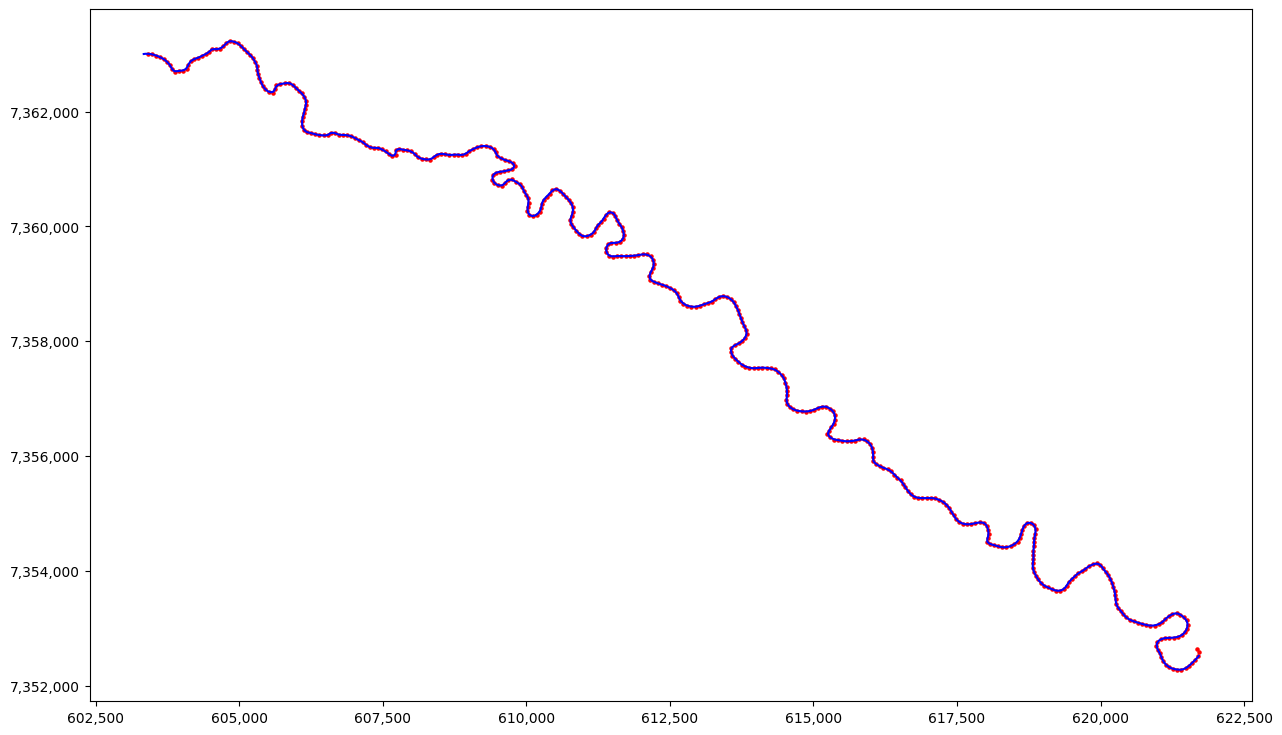

In [9]:
import geopandas as gpd
import numpy as np
from scipy.interpolate import BSpline
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter  # Import FuncFormatter explicitly

def create_nurbs(points):
    x, y = zip(*points)

    # Use spline and do not allow extrapolation
    t = np.linspace(0, 1, len(points))
    spl = BSpline(t, list(zip(x, y)), 2, extrapolate=True)

    t_new = np.linspace(0, 1, 600)
    spline_points = [Point(coord) for coord in zip(spl(t_new)[:, 0], spl(t_new)[:, 1])]


    bspline = LineString(spline_points)
    bspline_gdf = gpd.GeoDataFrame(geometry=list(spline_points))
   

    return bspline, bspline_gdf

# Generate NURBS curve
spline100, spline100_gdf = create_nurbs(pisteet100['geometry'].apply(lambda point: (point.x, point.y)).tolist())
print(pisteet100['geometry'])

# Plotting
fig, ax = plt.subplots(figsize=(15, 12))

# x and y axes formatting
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

# Plot NURBS line
gpd.GeoDataFrame(geometry=[spline100]).plot(ax=ax, color='blue')

# Plot points
pisteet100.plot(ax=ax, color='red', marker='o', markersize=5)

plt.show()


Etsitään juoluoiden päätepisteet ja niitä lähimpänä olevat joen pisteet, sekä laskee etäisyyden näiden välillä


In [10]:
'''
# Juoluoiden päätepisteet ja niitä lähimpänä olevat joen pisteet, sekä laskee etäisyyden näiden välillä
from shapely.ops import nearest_points

def oxbow_find_nearest_points(oxbow, mainchannel):
    oxbow['nearest_start'] = None
    oxbow['nearest_end'] = None
    oxbow['dist_start_nearest'] = None
    oxbow['dist_end_nearest'] = None
    dist_start_nearest = []

    dist_end_nearest = []

    for i in range(len(oxbow['geometry'])):
        start, start_nearest_channelpoint = nearest_points(oxbow['startpoint'].iloc[i], mainchannel['geometry'])
        end, end_nearest_channelpoint = nearest_points(oxbow['endpoint'].iloc[i], mainchannel['geometry'])
        
        oxbow['nearest_start'].iloc[i] = start_nearest_channelpoint[0]
        
        oxbow['nearest_end'].iloc[i] = end_nearest_channelpoint[0]

        
        # Calculate the distance between start point and its nearest point on the main channel
        dist_start_nearest = start.distance(start_nearest_channelpoint)
        oxbow['dist_start_nearest'].iloc[i] = dist_start_nearest[0]
        
        # Calculate the distance between end point and its nearest point on the main channel
        dist_end_nearest = end.distance(end_nearest_channelpoint)
        oxbow['dist_end_nearest'].iloc[i] = dist_end_nearest[0]
    

oxbow_find_nearest_points(juoluat, joen_keskiviiva)

print(juoluat)
'''

"\n# Juoluoiden päätepisteet ja niitä lähimpänä olevat joen pisteet, sekä laskee etäisyyden näiden välillä\nfrom shapely.ops import nearest_points\n\ndef oxbow_find_nearest_points(oxbow, mainchannel):\n    oxbow['nearest_start'] = None\n    oxbow['nearest_end'] = None\n    oxbow['dist_start_nearest'] = None\n    oxbow['dist_end_nearest'] = None\n    dist_start_nearest = []\n\n    dist_end_nearest = []\n\n    for i in range(len(oxbow['geometry'])):\n        start, start_nearest_channelpoint = nearest_points(oxbow['startpoint'].iloc[i], mainchannel['geometry'])\n        end, end_nearest_channelpoint = nearest_points(oxbow['endpoint'].iloc[i], mainchannel['geometry'])\n        \n        oxbow['nearest_start'].iloc[i] = start_nearest_channelpoint[0]\n        \n        oxbow['nearest_end'].iloc[i] = end_nearest_channelpoint[0]\n\n        \n        # Calculate the distance between start point and its nearest point on the main channel\n        dist_start_nearest = start.distance(start_nearest

In [11]:
import geopandas as gpd
from shapely.ops import nearest_points

def oxbow_find_nearest_points_sindex(oxbow, mainchannel):
    nearest_start_list = []
    nearest_end_list = []
    dist_start_nearest_list = []
    dist_end_nearest_list = []

    # Luo spatiaalinen indeksi 'mainchannel' DataFrame:lle
    sindex = mainchannel.sindex

    for i, oxbow_row in oxbow.iterrows():
        # Etsi lähimmät pisteet 'startpoint'-geometrialle 'mainchannel' DataFramesta
        start_nearest = mainchannel.geometry.iloc[sindex.nearest(oxbow_row['startpoint'])[1]]
        nearest_start = Point(start_nearest.x, start_nearest.y)
        nearest_start_list.append(nearest_start)

        # Etsi lähimmät pisteet 'endpoint'-geometrialle 'mainchannel' DataFramesta
        end_nearest = mainchannel.geometry.iloc[sindex.nearest(oxbow_row['endpoint'])[1]]
        nearest_end = Point(end_nearest.x, end_nearest.y)
        nearest_end_list.append(nearest_end)


        # Laske etäisyys 'startpoint'-pisteen ja sen lähimmän pisteen välillä
        dist_start_nearest = oxbow_row['startpoint'].distance(nearest_start)
        dist_start_nearest_list.append(dist_start_nearest)

        # Laske etäisyys 'endpoint'-pisteen ja sen lähimmän pisteen välillä
        dist_end_nearest = oxbow_row['endpoint'].distance(nearest_end)
        dist_end_nearest_list.append(dist_end_nearest)

    oxbow['nearest_start'] = nearest_start_list
    oxbow['nearest_end'] = nearest_end_list
    oxbow['dist_start_nearest'] = dist_start_nearest_list
    oxbow['dist_end_nearest'] = dist_end_nearest_list


# Kutsu funktiota oikeilla parametreilla
oxbow_find_nearest_points_sindex(juoluat, spline100_gdf)

print(juoluat)


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060...  2651.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856...  2147.0   
2  LINESTRING (609843.254 7360357.923, 609842.670...  3184.0   
3  LINESTRING (609203.291 7361123.482, 609201.240...  3272.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

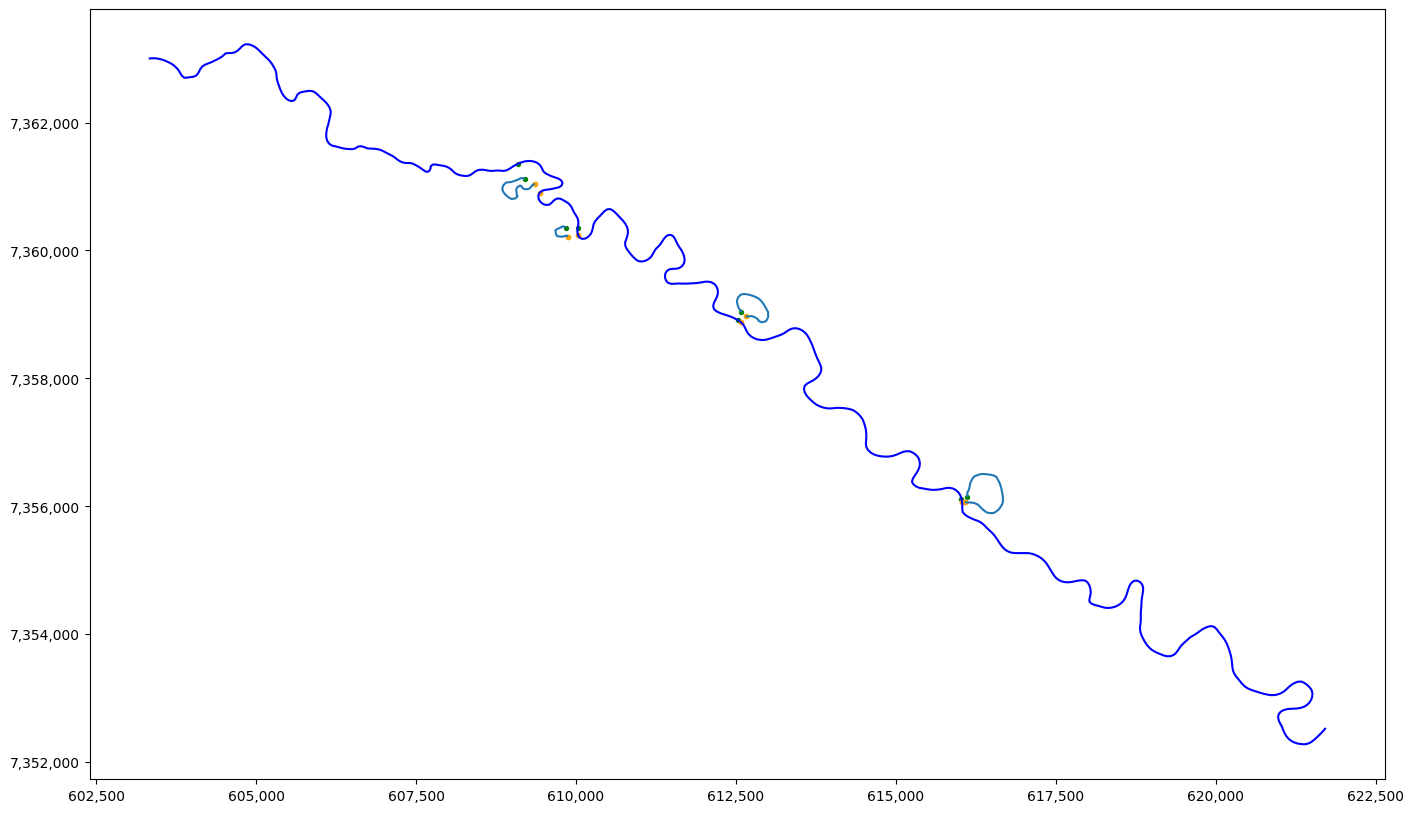

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Kuvakoko
fig, ax = plt.subplots(figsize=(25, 10))

# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

# Joen plottaus
# Plot NURBS line
gpd.GeoDataFrame(geometry=[spline100]).plot(ax=ax, color='blue')
# Juoluoiden plottaus
juoluat.plot(ax=ax)
# Juoluoiden päätepisteet
gpd.GeoDataFrame(geometry = juoluat['startpoint']).plot(ax=ax, color='green', markersize=8)
gpd.GeoDataFrame(geometry = juoluat['endpoint']).plot(ax=ax, color='orange', markersize=10)
# Lähimmät

gpd.GeoDataFrame(geometry = juoluat['nearest_start']).plot(ax=ax, color='green', markersize=8)
gpd.GeoDataFrame(geometry = juoluat['nearest_end']).plot(ax=ax, color='orange', markersize=10)


plt.show()

Juoluan päätepisteiden yhdistys lähimpiin joen pisteisiin

connecting lines [<LINESTRING (616117.848 7356152.986, 616026.945 7356122.42)>, <LINESTRING (616081.956 7356069.018, 616035.879 7356069.1)>]
[<LINESTRING (616117.848 7356152.986, 616026.945 7356122.42)>, <LINESTRING (616081.956 7356069.018, 616035.879 7356069.1)>]
LINESTRING (616117.8476999998 7356152.985800002, 616117.8556000004 7356154.424600001, 616117.8591999998 7356155.061500002, 616117.8644000003 7356156.006700002, 616117.8700000001 7356157.013700001, 616117.8755000001 7356158.0205999985, 616117.8810999999 7356159.027600002, 616117.8865999999 7356160.034600001, 616117.8921999997 7356161.0416, 616117.8978000004 7356162.048500001, 616117.9033000004 7356163.055500001, 616117.9089000002 7356164.0625, 616117.9145 7356165.069400001, 616117.9199999999 7356166.076400001, 616117.9255999997 7356167.0834, 616117.9312000005 7356168.090300001, 616117.9367000004 7356169.0973000005, 616117.9423000002 7356170.1043, 616117.9478000002 7356171.111299999, 616117.9534 7356172.1182, 616117.9589999998 

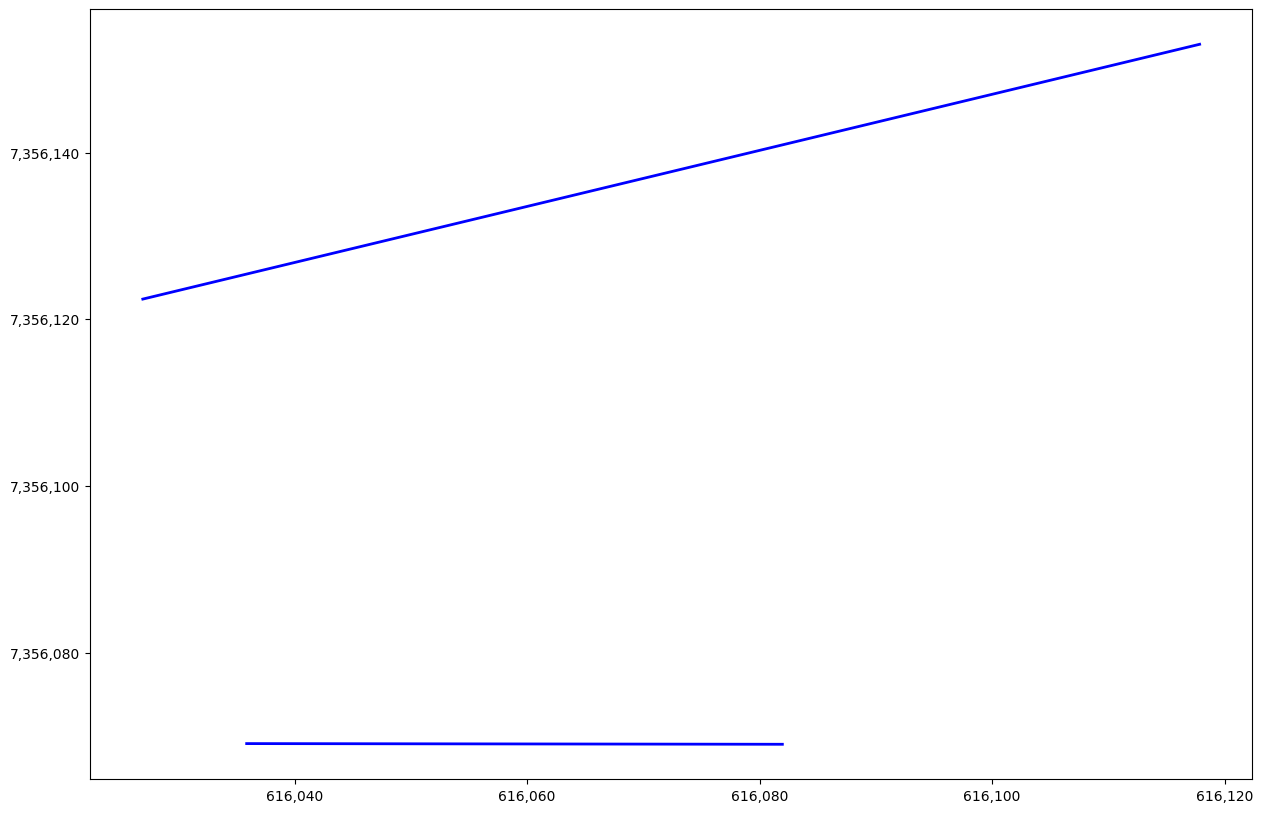

In [13]:
# Assuming dist_start and dist_end are lists containing distances between start and end points to their nearest points
def oxbow_connecting_paths(oxbow, meters):
    connecting_paths = []
    connecting_oxbow = []
    #TÄHÄN MYÖS JUOLUAN LISÄYS
    for i in range(len(oxbow)):
        if oxbow['dist_start_nearest'].iloc[i] < meters and oxbow['dist_end_nearest'].iloc[i] < meters:
            
            # Oxbow line
            connecting_oxbow = oxbow['geometry'].iloc[i]

            # Connect start and end points to their nearest points using NURBS
            start_point = oxbow['startpoint'].iloc[i]
            end_point = oxbow['endpoint'].iloc[i]
            start_nearest_point = oxbow['nearest_start'].iloc[i]  # Assuming startp is a list of tuples (start point, nearest point)
            end_nearest_point = oxbow['nearest_end'].iloc[i]     # Assuming endp is a list of tuples (end point, nearest point)
            
            # Create LineString connecting start, nearest, and end points
            connected_start = LineString([start_point, start_nearest_point])
            connected_end = LineString([end_point, end_nearest_point])
            connecting_paths.append(connected_start)
            connecting_paths.append(connected_end)
        else:
            continue

        print("connecting lines", connecting_paths)
        return connecting_paths, connecting_oxbow
    
connecting_path, connecting_oxbow = oxbow_connecting_paths(juoluat, 105)
print(connecting_path)
print(connecting_oxbow)
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Kuvakoko
fig, ax = plt.subplots(figsize=(15, 10))

# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

# Extract x and y coordinates from the LINESTRING
for i, line in enumerate(connecting_path):
    x, y = line.xy

    # Plot the LINESTRING
    ax.plot(x, y, color='blue', linewidth=2)

Yritetään yhdistää komponentit jokeen

connecting lines [<LINESTRING (616117.848 7356152.986, 616026.945 7356122.42)>, <LINESTRING (616081.956 7356069.018, 616035.879 7356069.1)>]
MULTILINESTRING ((603320.8814120726 7362998.906456105, 603368.0721379949 7363004.729044542, 603416.589297608 7363004.65505372, 603466.4328909118 7362998.684483638, 603517.6029179061 7362986.817334296, 603568.9046120206 7362969.643219227, 603618.3498568048 7362948.411996762, 603666.0250668274 7362924.800706066, 603710.3624452662 7362895.790176358, 603750.3719892004 7362859.976472538, 603786.0027338429 7362819.768995074, 603812.9875493699 7362775.337074997, 603839.4065424087 7362731.796588923, 603876.3159377562 7362700.239686292, 603923.7588569013 7362702.399408005, 603976.262431504 7362709.741514614, 604028.3738323818 7362716.753660645, 604073.500348361 7362742.10355762, 604102.0720804548 7362784.632535603, 604126.0291282199 7362832.8406113535, 604157.9571133787 7362875.249572681, 604201.8687961837 7362904.234121281, 604251.5061327168 7362924.39079

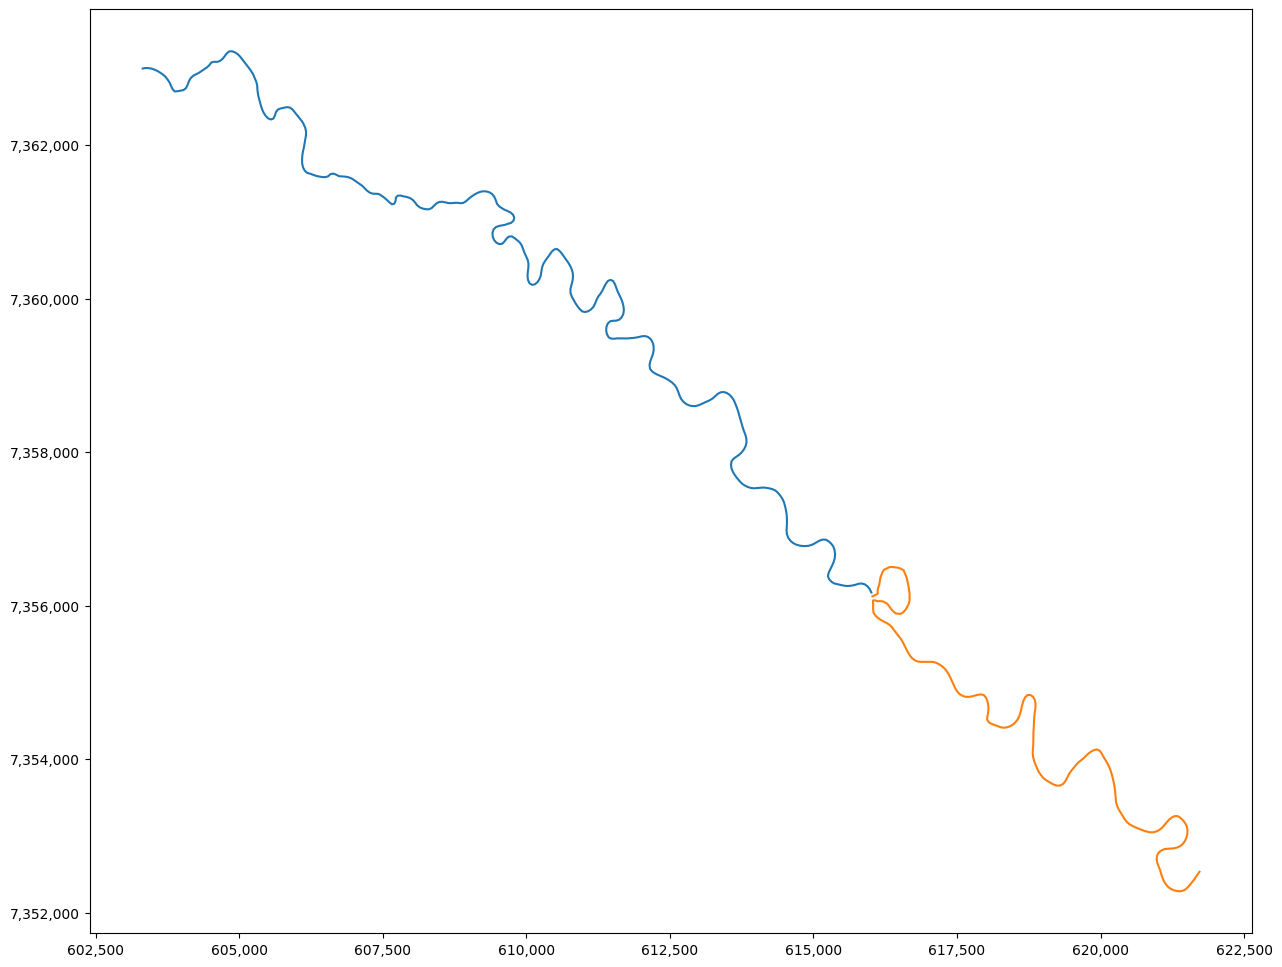

In [14]:
from shapely.geometry import MultiLineString
from shapely.ops import linemerge

def combine_segments(main_gdf, oxbow , meters):
    # Step 1: Define the main path LineString and oxbow lake LineStrings
    main_path = LineString(main_gdf['geometry'])

    #main_path = spline100
    #oxbow_lake = oxbow[oxbow['FID_'] == 2]['geometry'].iloc[0]

    new_path_segments = []

    #poistaa oxbowlake pisteet välistä
        
    start = oxbow['nearest_start'].iloc[1]
    end = oxbow['nearest_end'].iloc[1]

    newpath1 = []
    newpath2 = []

    add_points1 = True
    add_points2 = False

    min_s = min(Point(i).distance(start) for i in main_path.coords)
    min_e = min(Point(i).distance(end) for i in main_path.coords)

    for i in main_path.coords:
        if Point(i).distance(start) < min_s + 5:
            add_points1 = False
        
        if Point(i).distance(end) < min_e + 5:
            add_points2 = True
        
        if add_points1:
            newpath1.append(i)
        if add_points2:
            newpath2.append(i)
    
    new_path_segments.append(newpath1)
    #print(" 'eka' PATH ", newpath1)
    

    # Step 2: Define the connecting lines between the main path and the oxbow lakes

    connecting_lines, oxbow_lake = oxbow_connecting_paths(oxbow, meters)

    # Step 3: Merge lines and oxbow lakes into the main path

    #for i in connecting_lines: #JOS ONKIN MONTA KERRALLA
    new_path_segments.append(connecting_lines[0])
    #print(" 'eka' VIIVA", connecting_lines[0]) 

    new_path_segments.append(oxbow_lake) 
    #print("OXBOW", oxbow_lake)
    
    new_path_segments.append(connecting_lines[1]) 
    #print(" 'toka' VIIVA", connecting_lines[1])

    new_path_segments.append(newpath2)
    #print(" 'toka' PATH ", newpath2)


    # Create a new MultiLineString with the sorted LineStrings
    new_main_path = MultiLineString(new_path_segments)
    new_main_path = linemerge(new_main_path.geoms)

    # Step 4: Update the main path LineString

    all_coords = []
    for line_string in new_main_path.geoms:
        all_coords.extend(line_string.coords)

    return new_main_path, all_coords

new_main_path_multiline, all_coords_array = combine_segments(spline100_gdf, juoluat, 100)
#new_main_path_multiline, all_coords_array = combine_segments(jea_gdf, juoluat)
#TÄÄÄÄ PITÄÄ SELVITTÄÄÄ, MISSÄ KOHTAA OITÄÄ KÄÄNTÄÄÄ PISTEET ???

print(new_main_path_multiline)
print(all_coords_array)   

# Kuvakoko
fig, ax = plt.subplots(figsize=(15, 12))

# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

for line_string in new_main_path_multiline.geoms:
    x, y = line_string.xy
    ax.plot(x, y)


                           geometry
672  POINT (621689.988 7352498.474)
671  POINT (621656.075 7352461.736)
670  POINT (621621.126 7352425.985)
669  POINT (621585.161 7352391.257)
668  POINT (621547.999 7352357.822)
..                              ...
4    POINT (603518.747 7362986.434)
3    POINT (603470.071 7362997.841)
2    POINT (603420.496 7363004.187)
1    POINT (603370.524 7363004.725)
0    POINT (603320.881 7362998.906)

[673 rows x 1 columns]


<Axes: >

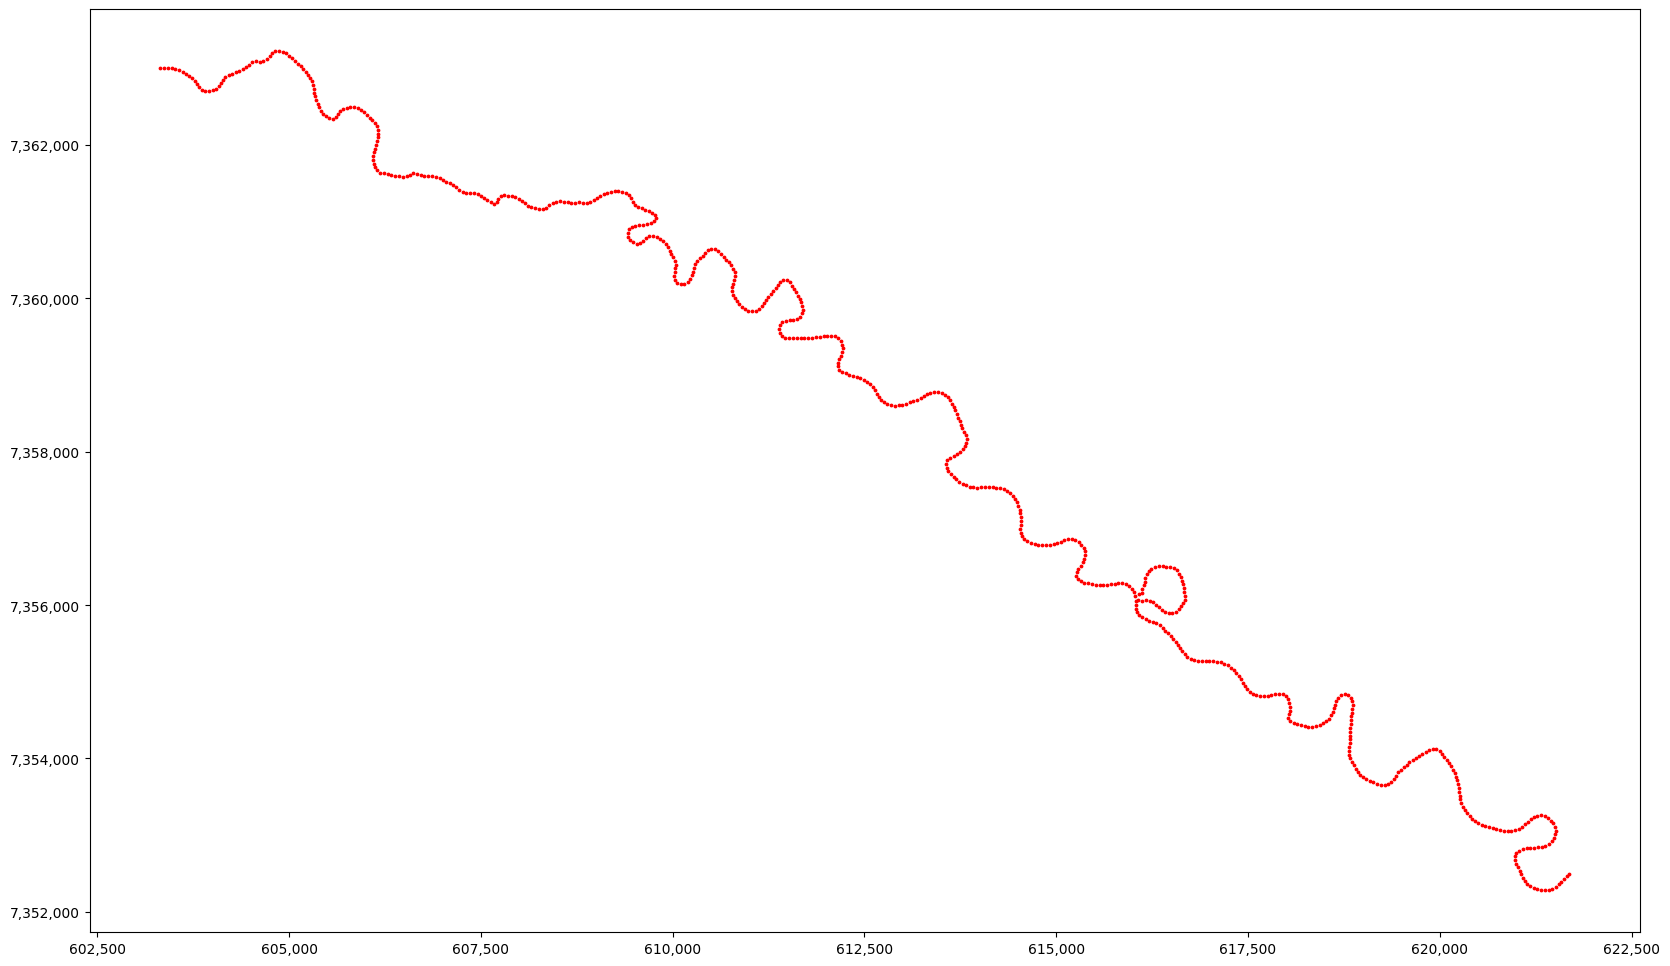

In [15]:

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

jou = create_breakpoints(LineString(all_coords_array), 50)

print(jou)

# Kuvakoko
fig, ax = plt.subplots(figsize=(20, 15))

# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

jou.plot(ax=ax, color='red', marker='o', markersize=3)


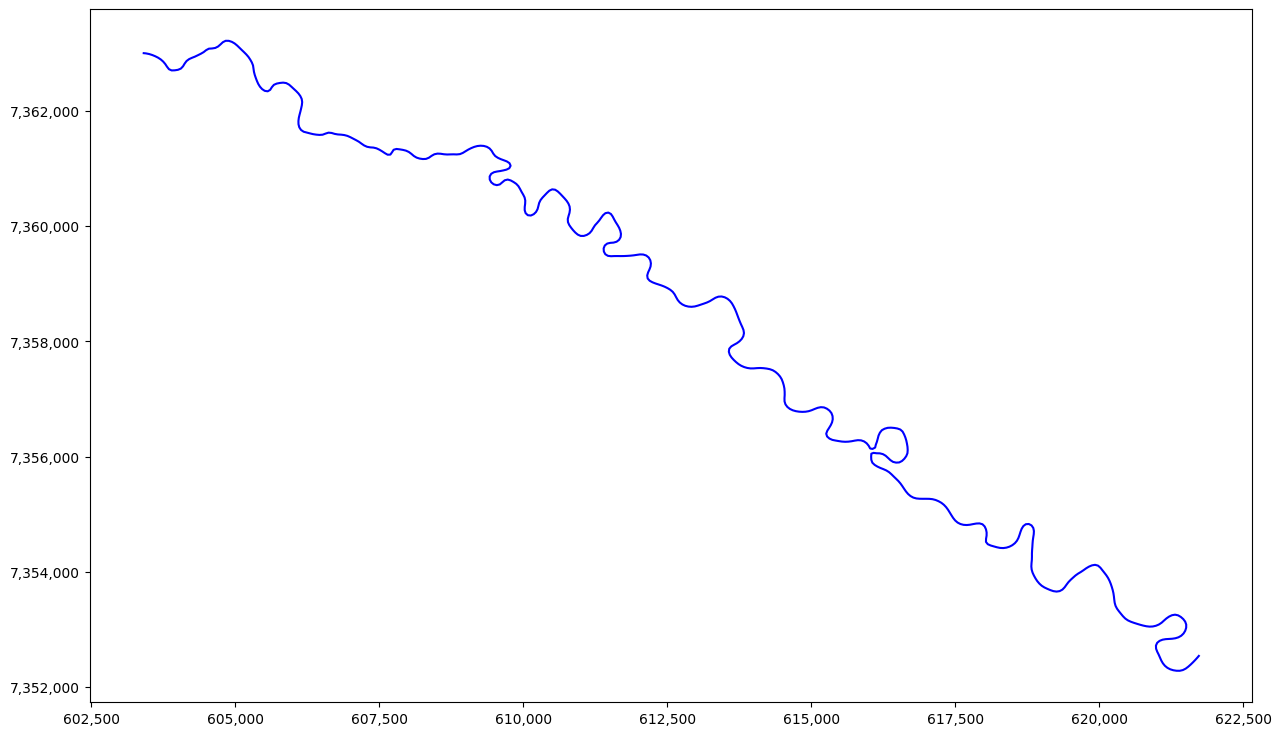

In [16]:

jea, jea_gdf = create_nurbs((jou['geometry']).apply(lambda point: (point.x, point.y)).tolist())
# Create a GeoDataFrame


# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# x and y axes formatting
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

# Plot NURBS line
#jea = gpd.GeoDataFrame(geometry=[jea])
#jea.plot(ax=ax, color='blue')

# Plot NURBS line
gpd.GeoDataFrame(geometry=[jea]).plot(ax=ax, color='blue')


plt.show()



Etsitään käännepisteet, jotka erottavat puolimeanderit toisistaan

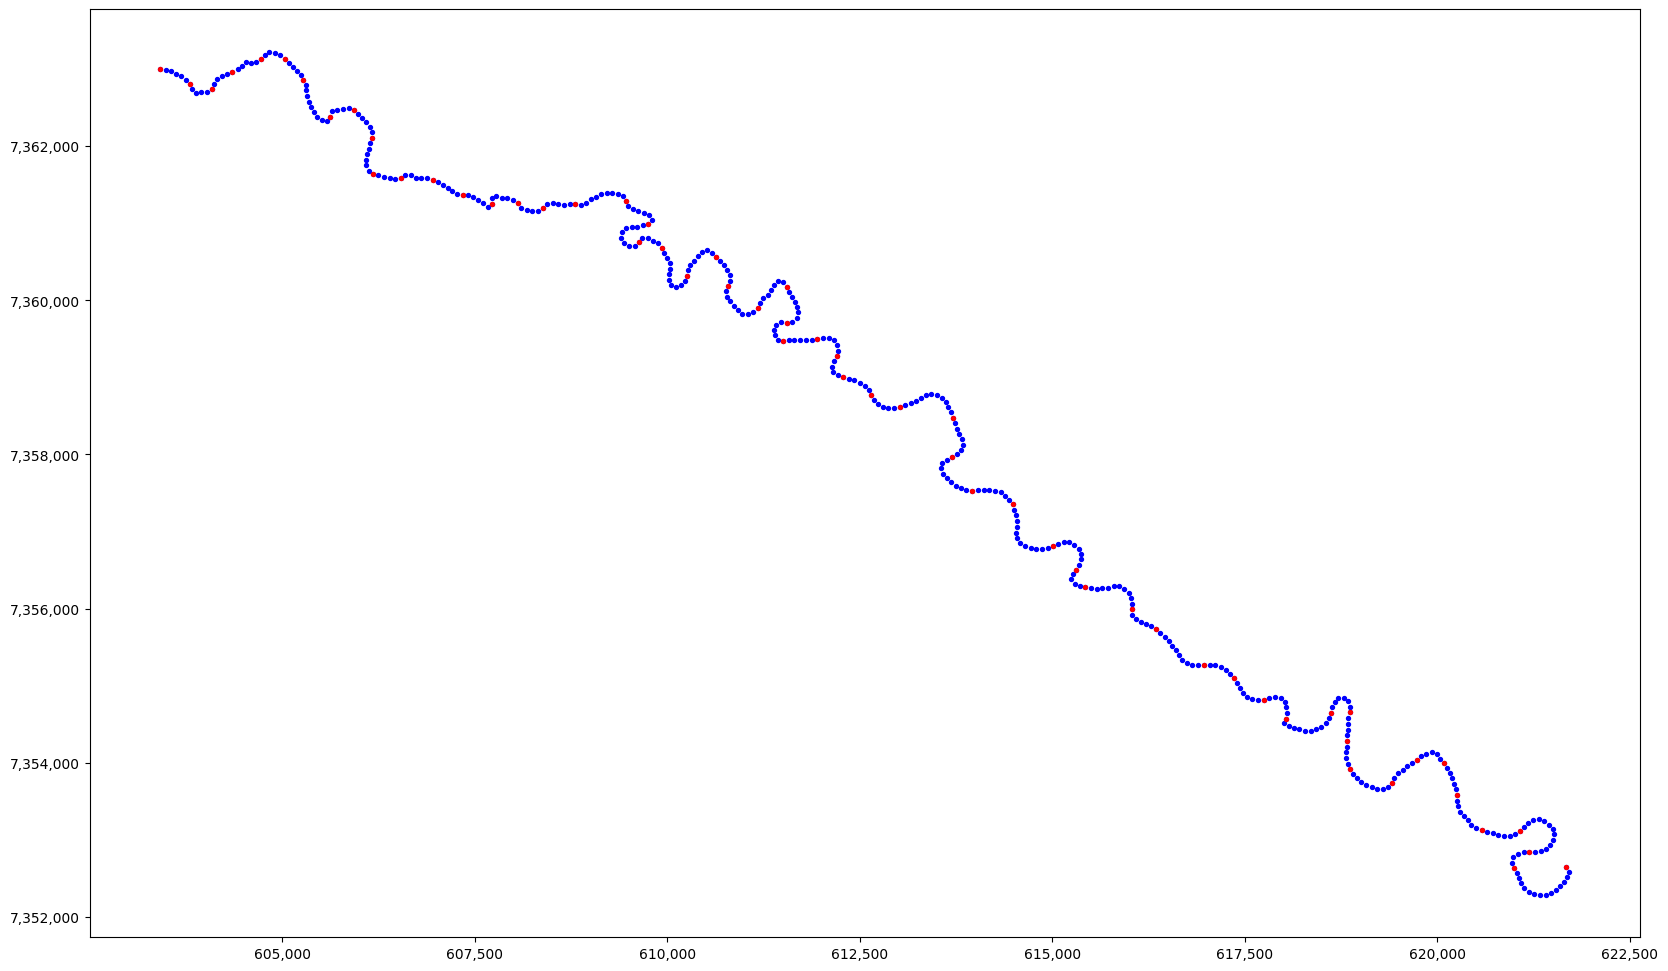

In [17]:
#KÄÄNNEpoints f(xi)=(x_{i-1} - x_i)*(x_i - x_{i+1})T avulla, Analyyttinen geometria 2016 s.6
import numpy as np
from numpy import linalg

def define_inflectionpoints(points, p_between):
    inflectionpoint_list = []
    points_in_between=0
    inflectionpoint_list.append(points.iloc[0]) #eka

    for i in range(1, len(points)-2):
        v1 = (np.array(points.iloc[i-1].coords[0])) - (np.array(points.iloc[i].coords[0]))
        v2 = (np.array(points.iloc[i].coords[0])) - (np.array(points.iloc[i+1].coords[0]))
        v2_orto = np.array([-v2[1], v2[0]])
        
        v3 = (np.array(points.iloc[i+1].coords[0])) - (np.array(points.iloc[i+2].coords[0]))
        v3_orto = np.array([-v3[1], v3[0]])


        dot_product1 = np.dot(v1, v2_orto)
        dot_product2 = np.dot(v2, v3_orto)

        points_in_between = points_in_between + 1
        
        if np.sign(dot_product1) != np.sign(dot_product2)  and points_in_between > p_between:
            inflectionpoint_list.append(points.iloc[i])
            
            points_in_between = 0
    inflectionpoint_list.append(points.iloc[len(points)-1]) #vipa
    
    return inflectionpoint_list


#Etsitään käännepoints
kaannepisteet100 = define_inflectionpoints(pisteet100['geometry'], 4)


# Kuvakoko, kaksi kuvaa
fig, ax = plt.subplots(figsize=(20, 15))

# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

# Piirrä muut points sinisenä
#pisteet200.plot(ax=ax, color='blue', marker='o', markersize=8, label='points p_i')
pisteet100.plot(ax=ax, color='blue', marker='o', markersize=8, label='points p_i')


# Piirrä käännepoints punaisena
#gpd.GeoDataFrame(geometry=kaannepisteet200).plot(ax=ax1, color='red', marker='o', markersize=8, label='Käännepoints')
gpd.GeoDataFrame(geometry=kaannepisteet100).plot(ax=ax, color='red', marker='o', markersize=8, label='Käännepoints')

plt.show()


Kuva pisteet100 kymmennen ensimmäisen pisteen kautta piirretyistä ympyröistä

471.84280103299864
628.5732982214538
1119.9001018318452
316.720493705759
494.4981413669686
274.69116977758006
211.35161706367114
69.0435663444131
271.14368213722884
147.1650703139837
112.66926997757363
397.99754732362805
153.25868356808138


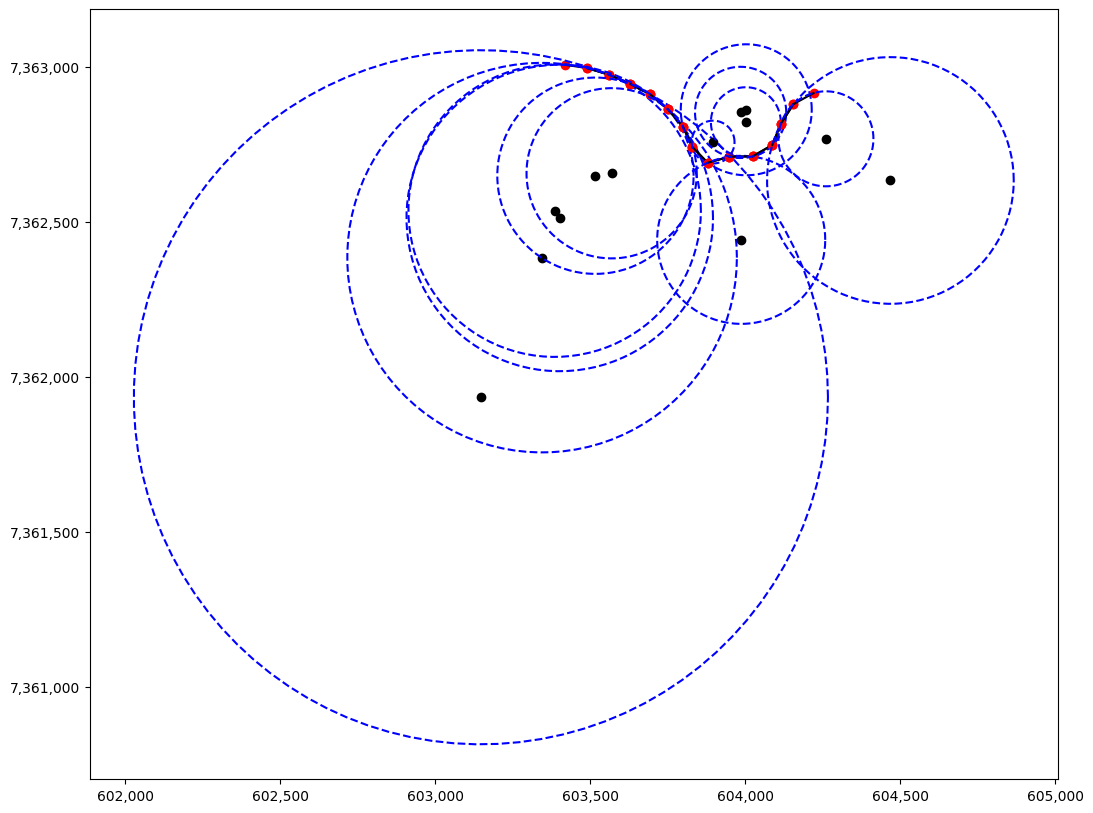

In [18]:
#PISTEET100 15 EKAA
#pisteet, janat, keskinormaalit, leikkauspisteet, ympyrän säde

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt


# Kuvakoko, kaksi kuvaa
fig, ax = plt.subplots(figsize=(15, 10))

# x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))


# Take first 10 points
pisteet100_subset = pisteet100.head(15)


for i in range(len(pisteet100_subset) - 2):
    p1 = np.array(pisteet100_subset['geometry'].iloc[i].coords[0])
    p2 = np.array(pisteet100_subset['geometry'].iloc[i + 1].coords[0])
    p3 = np.array(pisteet100_subset['geometry'].iloc[i + 2].coords[0])

    # Midpoints and normals
    midpoint1 = 0.5 * (p1 + p2)
    norm1 = - np.array([-(p2 - p1)[1], (p2 - p1)[0]])

    midpoint2 = 0.5 * (p2 + p3)
    norm2 = - np.array([-(p3 - p2)[1], (p3 - p2)[0]])

    # Solve equation
    A = np.array([[norm1[0], -norm2[0]], [norm1[1], -norm2[1]]])
    B = np.array([midpoint2[0] - midpoint1[0], midpoint2[1] - midpoint1[1]])

    solution = np.linalg.solve(A, B)

    # Intersection (multiplying with normal1 it's moving from mid1 to direction of norm1 to find the intersection point)
    intersection_point = midpoint1 + solution[1] * norm1

    # Plotting
    ax.plot(*p1, 'ro', label='p1')
    ax.plot(*p2, 'ro', label='p2')
    ax.plot(*p3, 'ro', label='p3')

    #ax.quiver(midpoint1[0], midpoint1[1], norm1[0], norm1[1], angles='xy', scale_units='xy', scale=1, color='g', label='Midpoint1 normal')
    #ax.quiver(midpoint2[0], midpoint2[1], norm2[0], norm2[1], angles='xy', scale_units='xy', scale=1, color='y', label='Midpoint2 normal')

    ax.plot(*intersection_point, 'ko', label='Intersection Point')

    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    ax.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')

    # Midpoint and radius for circle
    midpoint = intersection_point
    radius = np.linalg.norm(midpoint - p1)
    print(radius)

    # Circle
    theta = np.linspace(0, 2*np.pi, 100)
    x_circle = midpoint[0] + radius * np.cos(theta)
    y_circle = midpoint[1] + radius * np.sin(theta)
    ax.plot(x_circle, y_circle, 'b--', label='Circle')


# Asetetaan oikea skaala, jotta ympyrä näkyy oikein
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()



Kuva säteen laskemisesta

[ 2.  -1.5]


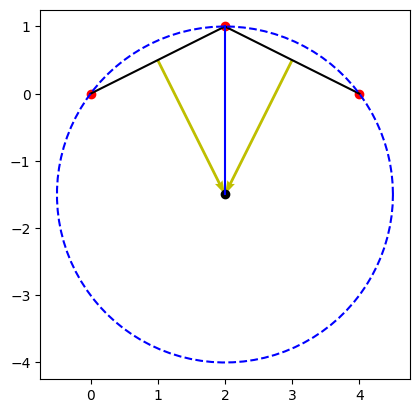

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Määritellään kolme pistettä
p1 = np.array([0, 0])
p2 = np.array([2, 1])
p3 = np.array([4, 0])

# Lasketaan janojen keskinormaalien leikkauspiste
midpoint1 = 0.5 * (p1 + p2)
normal1 = - np.array([-(p2 - p1)[1], (p2 - p1)[0]])   # "-" että nuoli osoittaa oikeaan suuntaan

midpoint2 = 0.5 * (p2 + p3)
normal2 = - np.array([-(p3 - p2)[1], (p3 - p2)[0]])

# Muodostetaan yhtälöpari
A = np.array([[normal1[0], -normal2[0]], [normal1[1], -normal2[1]]])
B = np.array([midpoint2[0] - midpoint1[0], midpoint2[1] - midpoint1[1]])

# Ratkaistaan yhtälöpari
solution = np.linalg.solve(A, B)

# Lasketaan leikkauspiste
intersection_point = midpoint1 + solution[0] * normal1
print(intersection_point)

# Lasketaan ympyrän keskipiste ja säde
radius = np.linalg.norm(intersection_point - p2)

# Piirretään pisteet, janojen keskinormit, leikkauspiste ja ympyrä
fig, ax = plt.subplots()

# Piirrä pisteet
ax.plot(*p1, 'ro', label='p1')
ax.plot(*p2, 'ro', label='p2')
ax.plot(*p3, 'ro', label='p3')

# Piirrä janojen keskinormit
ax.quiver(midpoint1[0], midpoint1[1], normal1[0], normal1[1], angles='xy', scale_units='xy', scale=1, color='y', label='Midpoint1 normal')
ax.quiver(midpoint2[0], midpoint2[1], normal2[0], normal2[1], angles='xy', scale_units='xy', scale=1, color='y', label='Midpoint2 normal')

# Piirrä leikkauspiste
ax.plot(*intersection_point, 'ko', label='Intersection Point')

# Piirrä janat p1p2 ja p2p3
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', label='p1p2')
ax.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-', label='p2p3')

#p2 ja keskipiste jana
ax.plot([p2[0], intersection_point[0]], [p2[1], intersection_point[1]], 'b-', label='p2 to Intersection Point')

# Piirrä ympyrä
theta = np.linspace(0, 2*np.pi, 100)
x_circle = intersection_point[0] + radius * np.cos(theta)
y_circle = intersection_point[1] + radius * np.sin(theta)
ax.plot(x_circle, y_circle, 'b--', label='Circle')

# Asetetaan oikea skaala, jotta ympyrä näkyy oikein
ax.set_aspect('equal', adjustable='box')

# Näytetään pisteet, janojen keskinormit, leikkauspiste ja ympyrä
#plt.grid(True)
plt.show()


Säteen laskeminen, ja keskinormaalien leikkauspisteiden selvitys ennen tätä

In [20]:
#points, janat, keskinormaalit, leikkauspisteet, ympyrän säde

import numpy as np


def radius_and_intersectionpoint(points):
    radius_list = []
    intersectionpoint_list = []


    for i in range(len(points) - 2):

        # kolme peräkkäistä pistettä
        p1 = np.array(points['geometry'].iloc[i].coords[0])
        p2 = np.array(points['geometry'].iloc[i + 1].coords[0])
        p3 = np.array(points['geometry'].iloc[i + 2].coords[0])

        # Lasketaan janojen keskinormaalien leikkauspiste
        midpoint1 = 0.5 * (p1 + p2)
        normal1 = np.array([-(p2 - p1)[1], (p2 - p1)[0]])

        midpoint2 = 0.5 * (p2 + p3)
        normal2 = np.array([-(p3 - p2)[1], (p3 - p2)[0]])

        # Muodostetaan yhtälöpari
        A = np.array([[normal1[0], -normal2[0]], [normal1[1], -normal2[1]]])
        B = np.array([midpoint2[0] - midpoint1[0], midpoint2[1] - midpoint1[1]])
        if np.linalg.det(A) == 0:
            print("Singular matrix. Skipping this point.")
            continue
        else:
        # Ratkaistaan yhtälöpari
            solution = np.linalg.solve(A, B)

            # Lasketaan leikkauspiste
            intersection_points = midpoint1 + solution[1] * normal1
            intersectionpoint_list.append(intersection_points)
        
            # Lasketaan ympyrän keskipiste ja säde
            radius = np.linalg.norm(intersection_points - p2)
            radius_list.append(radius)

    return radius_list, intersectionpoint_list, solution, A, B 

sade100, inter100, sol100, A100, B100 = radius_and_intersectionpoint(pisteet100)

print("R 100:", sade100)




R 100: [471.84280103300085, 628.573298221436, 1119.9001018318436, 316.7204937058563, 494.49814136701974, 274.6911697776549, 211.35161706371719, 69.04356634408983, 271.1436821372608, 147.16507031399874, 112.66926997782727, 397.99754732353836, 153.25868356823327, 366.6142037402519, 415.59726079604246, 1778.9418526674071, 646.7077883697096, 221.17270235242506, 74.81706399412894, 231.89329347958804, 157.79921976988572, 240.03011352100853, 256.22178542675323, 95.5620228182403, 335.94502940778773, 254.83141586783927, 683.8187065798991, 1472.7955520081384, 69267.73699110495, 784.4182604618883, 341.9770133769954, 19596.47476916811, 167.07338120737396, 581.1260675678219, 406.9586320174992, 24719.71041667621, 1035.4898185238403, 311.1183893963, 309.76064736370796, 137.77700406238313, 75.11811154330037, 212.437978094822, 82.94004754750642, 427.8467852034656, 6221.910271119456, 126.95415088914757, 205.44308344866758, 1076.0605678342156, 4756.570815461585, 421.46847437230514, 331.8270535853677, 153

Kaarevuuden laskeminen ja visualisointi

                           geometry  curvature
434  POINT (603419.733 7363005.832)        NaN
433  POINT (603489.003 7362995.473)   0.002119
432  POINT (603560.800 7362973.881)   0.001591
431  POINT (603628.961 7362944.098)   0.000893
430  POINT (603693.821 7362910.415)   0.003157
..                              ...        ...
4    POINT (621593.316 7352398.128)   0.000585
3    POINT (621646.502 7352450.942)   0.002035
2    POINT (621690.936 7352511.113)   0.003828
1    POINT (621716.484 7352581.389)        NaN
0    POINT (621674.249 7352638.194)        NaN

[435 rows x 2 columns]


C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


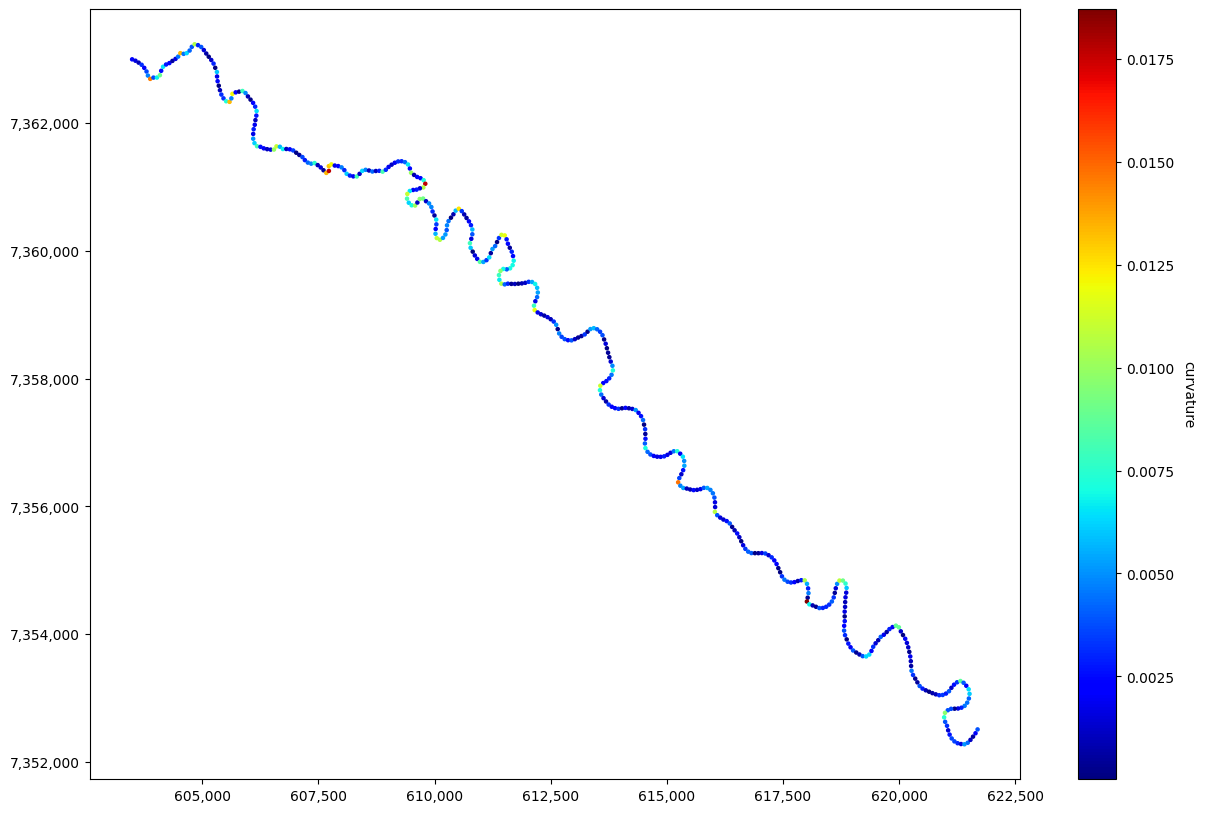

In [21]:
#KAAAREVUUUS 1/R 100


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def calculate_curvature(points, radius):
    curvature_list = []
    shifted_radius = [np.nan] + radius[:-1]

    points['curvature'] = np.nan

    for i in range(len(points) - 2):
        radius = shifted_radius[i]
        curvature = 1 / radius
        curvature_list.append(curvature)

    # Kaarevuusarvoja ei kahdelle ekalle pisteessä
    points['curvature'][:-2] = curvature_list


calculate_curvature(pisteet100, sade100)

print(pisteet100)


fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(
    pisteet100.geometry.x,
    pisteet100.geometry.y,
    c=pisteet100['curvature'],
    cmap='jet',
    s=5
)

    # Lisää värikartan selitys
cbar = plt.colorbar(scatter, label='Curvature')
cbar.set_label('curvature', rotation=270, labelpad=15)

    # x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

plt.show()


Puolimeanderien määritys

In [22]:
#MÄÄRITELLÄÄN halfmeander

def define_halfmeander(points, inflectionpoints):
    points['halfmeander'] = None
    halfmeander_id = 0
    j = 1

    for i in range(len(points['geometry'])):
        if points['geometry'].iloc[i].coords[0] == inflectionpoints[j].coords[0]:
            points.at[len(points) - i - 1, 'halfmeander'] = halfmeander_id
            halfmeander_id += 1
            if j != len(inflectionpoints) - 1:
                j += 1
        else:
            points.at[len(points) - i - 1, 'halfmeander'] = halfmeander_id

# Example usage for 200m interval
# define_halfmeander(pisteet200, kaannepisteet200)

# Example usage for 200m interval
define_halfmeander(pisteet100, kaannepisteet100)

print(pisteet100)



                           geometry  curvature halfmeander
434  POINT (603419.733 7363005.832)        NaN           0
433  POINT (603489.003 7362995.473)   0.002119           0
432  POINT (603560.800 7362973.881)   0.001591           0
431  POINT (603628.961 7362944.098)   0.000893           0
430  POINT (603693.821 7362910.415)   0.003157           0
..                              ...        ...         ...
4    POINT (621593.316 7352398.128)   0.000585          58
3    POINT (621646.502 7352450.942)   0.002035          58
2    POINT (621690.936 7352511.113)   0.003828          58
1    POINT (621716.484 7352581.389)        NaN          58
0    POINT (621674.249 7352638.194)        NaN          58

[435 rows x 3 columns]


Puolimeanderien visualisointi

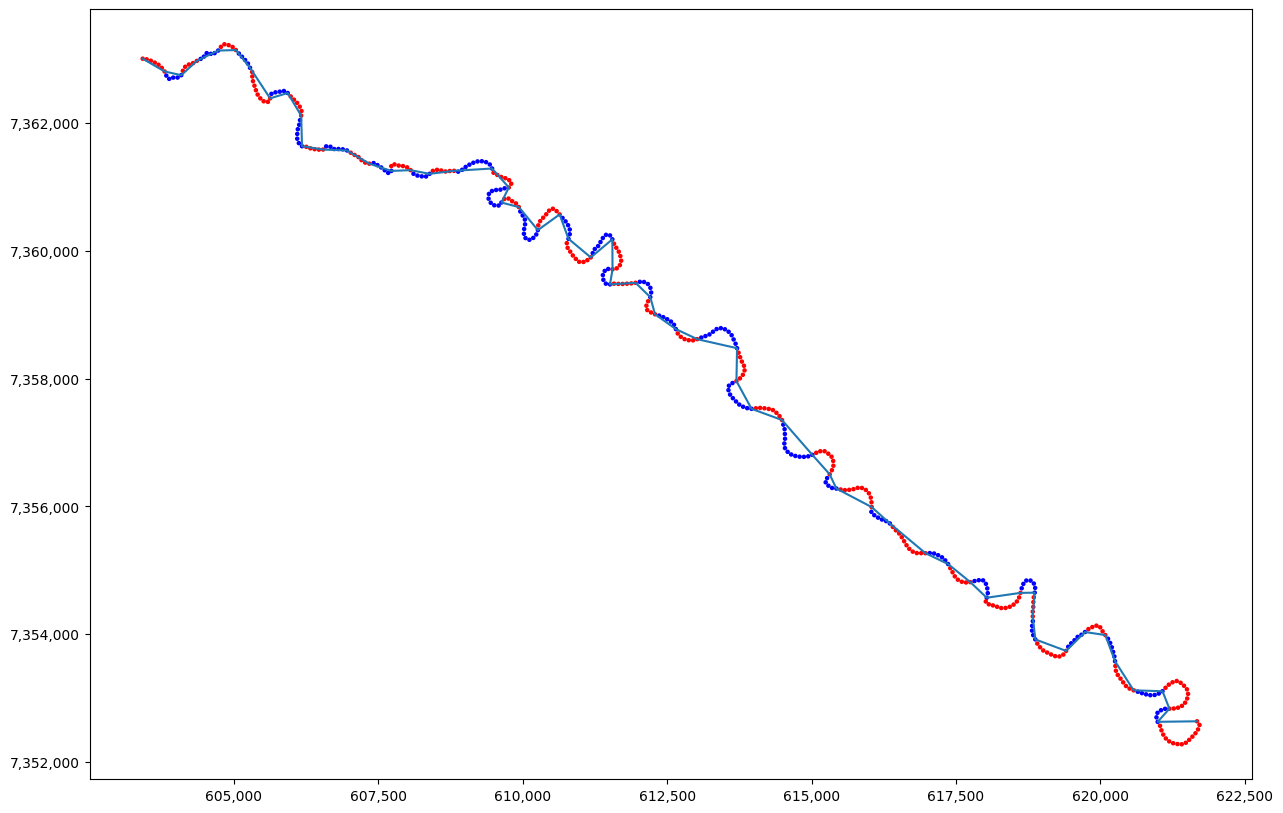

In [23]:
#Erottaa väreillä puolimeanderit ja plottaa

from matplotlib.colors import ListedColormap

colors = ['red' if i % 2 == 0 else 'blue' for i in range(pisteet100['halfmeander'].nunique())]
cmap = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(
    pisteet100.geometry.x,
    pisteet100.geometry.y,
    c=pisteet100['halfmeander'],
    cmap=cmap,
    s=5
)
#JANAT KÄÄNNEPISTEIDEN VÄLIIN
# Erota x- ja y-koordinaatit
kaanne100_x_coordinates = [point.x for point in kaannepisteet100]
kaanne100_y_coordinates = [point.y for point in kaannepisteet100]
# Piirrä janat pisteiden välille
plt.plot(kaanne100_x_coordinates, kaanne100_y_coordinates, linestyle='-')

# Aseta x- ja y-akselien muotoilu
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))



plt.show()

                           geometry  curvature halfmeander norm_curvature
434  POINT (603419.733 7363005.832)        NaN           0            NaN
433  POINT (603489.003 7362995.473)   0.002119           0       0.582167
432  POINT (603560.800 7362973.881)   0.001591           0       0.437007
431  POINT (603628.961 7362944.098)   0.000893           0       0.245282
430  POINT (603693.821 7362910.415)   0.003157           0       0.867298
..                              ...        ...         ...            ...
4    POINT (621593.316 7352398.128)   0.000585          58       0.113434
3    POINT (621646.502 7352450.942)   0.002035          58       0.394865
2    POINT (621690.936 7352511.113)   0.003828          58       0.742819
1    POINT (621716.484 7352581.389)        NaN          58            NaN
0    POINT (621674.249 7352638.194)        NaN          58            NaN

[435 rows x 4 columns]


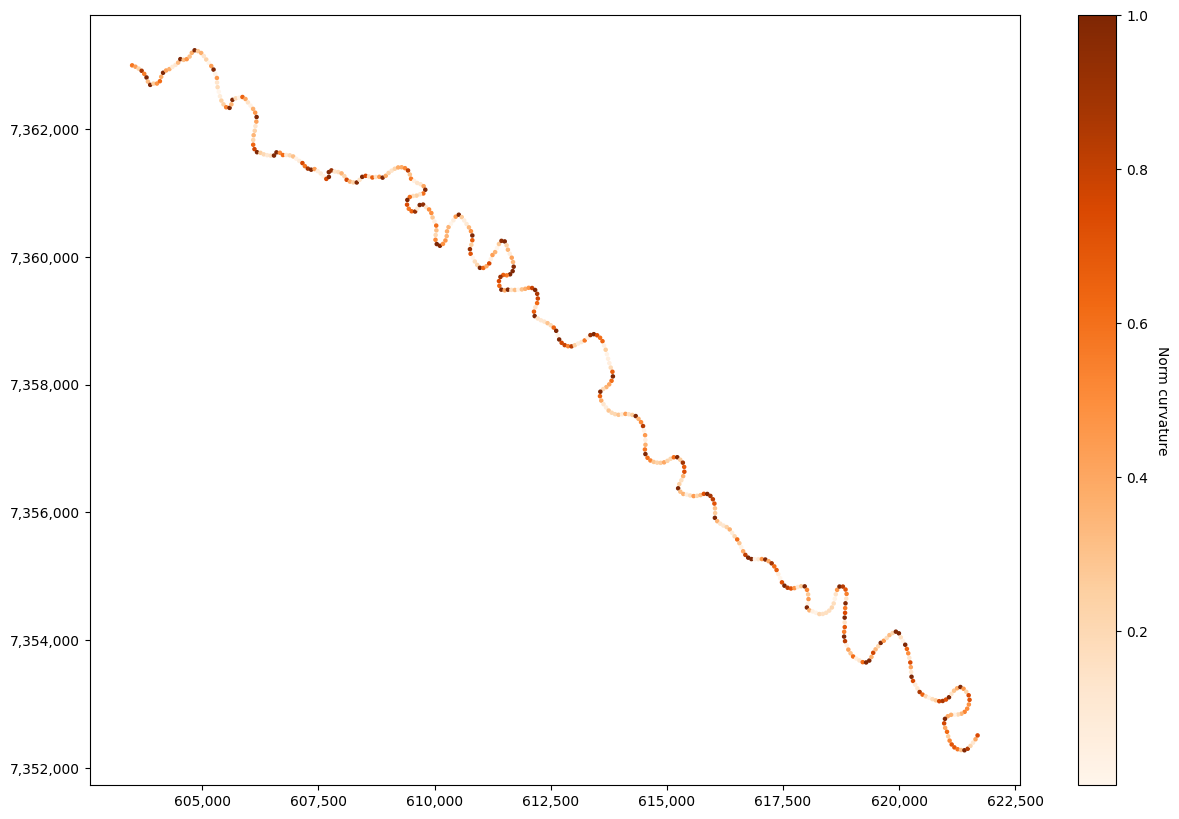

In [24]:
#NORMALISOITU KAAREVUUS k(x_i,j)/K_M_j


def define_normalized_curvature(points):
    points['norm_curvature'] = None

    for i in range(max(points['halfmeander'])+1): 

            pm = (points['halfmeander'] == i)
            filtered_pm = points[pm]

            maxcurvature = filtered_pm['curvature'].max()

            # Iterate through the index of filtered_pm
            for index in filtered_pm.index:
                # Use loc to set values in the original dataframe
                points.loc[index, 'norm_curvature'] = filtered_pm.loc[index, 'curvature'] / maxcurvature

define_normalized_curvature(pisteet100)

print(pisteet100)



fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(
    pisteet100.geometry.x,
    pisteet100.geometry.y,
    c=pisteet100['norm_curvature'],
    cmap='Oranges',
    s=5
)

    # Lisää värikartan selitys
cbar = plt.colorbar(scatter, label='Norm curvature')
cbar.set_label('Norm curvature', rotation=270, labelpad=15)

    # x ja y akselit
def format_eastings(value, pos):
    return f'{int(value):,}'

def format_northings(value, pos):
    return f'{int(value):,}'

ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

plt.show()
                  

Migraatio suunnat D ja L

In [25]:
#MÄÄRITTELEE SUUNNAT D JA L
import math


def define_directions(inflectionpoints):
    D_list = []
    L_list = []
    
    for i in range(len(inflectionpoints) - 1):
        x1, y1 = inflectionpoints[i].x, inflectionpoints[i].y
        x2, y2 = inflectionpoints[i + 1].x, inflectionpoints[i + 1].y

        # Calculate direction vector v
        v = (x2 - x1, y2 - y1)

        # Calculate the length of the vector v
        v_length = math.sqrt(v[0] ** 2 + v[1] ** 2) 

        # Normalize direction vector
        # Parallel direction D
        D = (v[0] / v_length, v[1] / v_length)

        # Perpendicular direction L
        L = (- D[1], D[0])

        D_list.append(D)
        L_list.append(L)

    return D_list, L_list

D100, L100 = define_directions(kaannepisteet100)
print("D:", D100)
print("L:", L100)



D: [(0.8843542269740681, -0.4668164534729881), (0.980035561727747, -0.19882227679256548), (0.76980266749429, 0.6382819542480233), (0.9162566740069804, 0.4005916965410868), (0.9996909422455792, 0.024860007887085), (0.6619567388679086, -0.7495420440958356), (0.5880335692528985, -0.8088365233047384), (0.9642590548698975, 0.26496127094617455), (0.5508007775527813, -0.8346367493989535), (0.030998900535487397, -0.9995194186035562), (0.9899708748499475, -0.14127160701581015), (0.9993939315390636, -0.03481048122180138), (0.882488456887907, -0.47033405517738214), (0.9585726163624536, -0.2848482739284903), (0.9993758773376265, 0.03532500241542126), (0.9849556330026186, -0.172807410189526), (0.9939007333156326, 0.11027843086772599), (0.9984777182605395, 0.0551565602374416), (0.6987634888631642, -0.7153527707584411), (-0.4775652200527445, -0.8785963012646785), (0.9735043111481297, -0.22866866024010735), (0.6748145245079582, -0.7379873694807372), (0.8384107802778462, 0.5450388642233627), (0.3717644

Liikkumisarvot

In [26]:
#Malli
#LIIKKUMISARVOT metreinä

def offsets(points, OD, OL, sD, sL, w):
    od_xi = []
    ol_xi = []

    max_curvature=points['curvature'].max()

    for i in range(len(points)):
            
        if w > 0:
            OD_xi = OD - (sD * (points['curvature'].iloc[i] / max_curvature))

            OL_xi = OL - (sL * (1 - (points['curvature'].iloc[i] / max_curvature)))


        elif w < 0:
            OD_xi = OD - (sD * (1 - (points['curvature'].iloc[i] / max_curvature)))

            OL_xi = OL - (sL * (points['curvature'].iloc[i] / max_curvature))

        #probability distribution accepting negative offsets of lateral and downstream migration
        od_xi.append(OD_xi)
        ol_xi.append(OL_xi)

        #probability distribution not accepting negative offsets of lateral and downstream migration
        #od_xi.append(np.abs(OD_xi))
        #ol_xi.append(np.abs(OL_xi))

    return od_xi, ol_xi


Algoritmi käänteiselle migraatiolle
Kaarevuudesta riippuva migraatio

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


round 0
                           geometry
0    POINT (603342.049 7362987.733)
1    POINT (603377.866 7362999.559)
2    POINT (603417.745 7363004.045)
3    POINT (603461.686 7363001.190)
4    POINT (603509.689 7362990.995)
..                              ...
595  POINT (621548.490 7352375.594)
596  POINT (621588.418 7352412.962)
597  POINT (621629.293 7352451.855)
598  POINT (621671.115 7352492.273)
599  POINT (621713.883 7352534.216)

[600 rows x 1 columns]
connecting lines [<LINESTRING (616117.848 7356152.986, 616024.065 7356124.988)>, <LINESTRING (616081.956 7356069.018, 616040.785 7356064.725)>]
round 0
                           geometry
0    POINT (603342.049 7362987.733)
1    POINT (603377.866 7362999.559)
2    POINT (603417.745 7363004.045)
3    POINT (603461.686 7363001.190)
4    POINT (603509.689 7362990.995)
..                              ...
595  POINT (621548.490 7352375.594)
596  POINT (621588.418 7352412.962)
597  POINT (621629.293 7352451.855)
598  POINT (621671.115 7

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060...  -749.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -1253.0   
2  LINESTRING (609843.254 7360357.923, 609842.670...  -216.0   
3  LINESTRING (609203.291 7361123.482, 609201.240...  -128.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -1149.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -1653.0   
2  LINESTRING (609843.254 7360357.923, 609842.670...  -616.0   
3  LINESTRING (609203.291 7361123.482, 609201.240...  -528.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -1549.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -2053.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -1016.0   
3  LINESTRING (609203.291 7361123.482, 609201.240...  -928.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -1949.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -2453.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -1416.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -1328.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -2349.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -2853.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -1816.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -1728.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -2749.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -3253.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -2216.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -2128.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -3149.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -3653.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -2616.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -2528.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -3549.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -4053.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -3016.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -2928.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -3949.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -4453.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -3416.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -3328.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -4349.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -4853.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -3816.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -3728.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -4749.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -5253.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -4216.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -4128.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -5149.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -5653.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -4616.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -4528.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -5549.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -6053.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -5016.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -4928.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -5949.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -6453.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -5416.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -5328.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -6349.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -6853.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -5816.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -5728.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list
C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -7149.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -7653.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -6616.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -6528.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -7549.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -8053.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -7016.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -6928.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -7949.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -8453.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -7416.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -7328.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -8349.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -8853.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -7816.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -7728.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -8749.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -9253.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -8216.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -8128.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry     age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -9149.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -9653.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -8616.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -8528.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361038.5

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry      age   
0  LINESTRING (612586.295 7359035.916, 612586.060...  -9549.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -10053.0   
2  LINESTRING (609843.254 7360357.923, 609842.670...  -9016.0   
3  LINESTRING (609203.291 7361123.482, 609201.240...  -8928.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry      age   
0  LINESTRING (612586.295 7359035.916, 612586.060...  -9949.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -10453.0   
2  LINESTRING (609843.254 7360357.923, 609842.670...  -9416.0   
3  LINESTRING (609203.291 7361123.482, 609201.240...  -9328.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry      age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -10349.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -10853.0   
2  LINESTRING (609843.254 7360357.923, 609842.670...  -9816.0   
3  LINESTRING (609203.291 7361123.482, 609201.240...  -9728.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry      age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -10749.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -11253.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -10216.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -10128.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry      age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -11149.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -11653.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -10616.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -10528.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry      age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -11549.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -12053.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -11016.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -10928.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361

C:\Users\oonao\AppData\Local\Temp\ipykernel_11580\3840831434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points['curvature'][:-2] = curvature_list


   FID_  FID_juolua   Shape_Leng   
0     1           0  1370.832289  \
1     2           0  1847.408160   
2     5           0   456.904342   
3     6           0  1242.933939   

                                            geometry      age   
0  LINESTRING (612586.295 7359035.916, 612586.060... -11949.0  \
1  LINESTRING (616117.848 7356152.986, 616117.856... -12453.0   
2  LINESTRING (609843.254 7360357.923, 609842.670... -11416.0   
3  LINESTRING (609203.291 7361123.482, 609201.240... -11328.0   

                                     startpoint   
0  POINT (612586.2951999996 7359035.9158000015)  \
1   POINT (616117.8476999998 7356152.985800002)   
2   POINT (609843.2536000004 7360357.922899999)   
3   POINT (609203.2912999997 7361123.481800001)   

                                      endpoint   
0  POINT (612656.4088000003 7358979.316599999)  \
1  POINT (616081.9561000001 7356069.018199999)   
2  POINT (609871.2938000001 7360213.739300001)   
3       POINT (609358.5363999996 7361

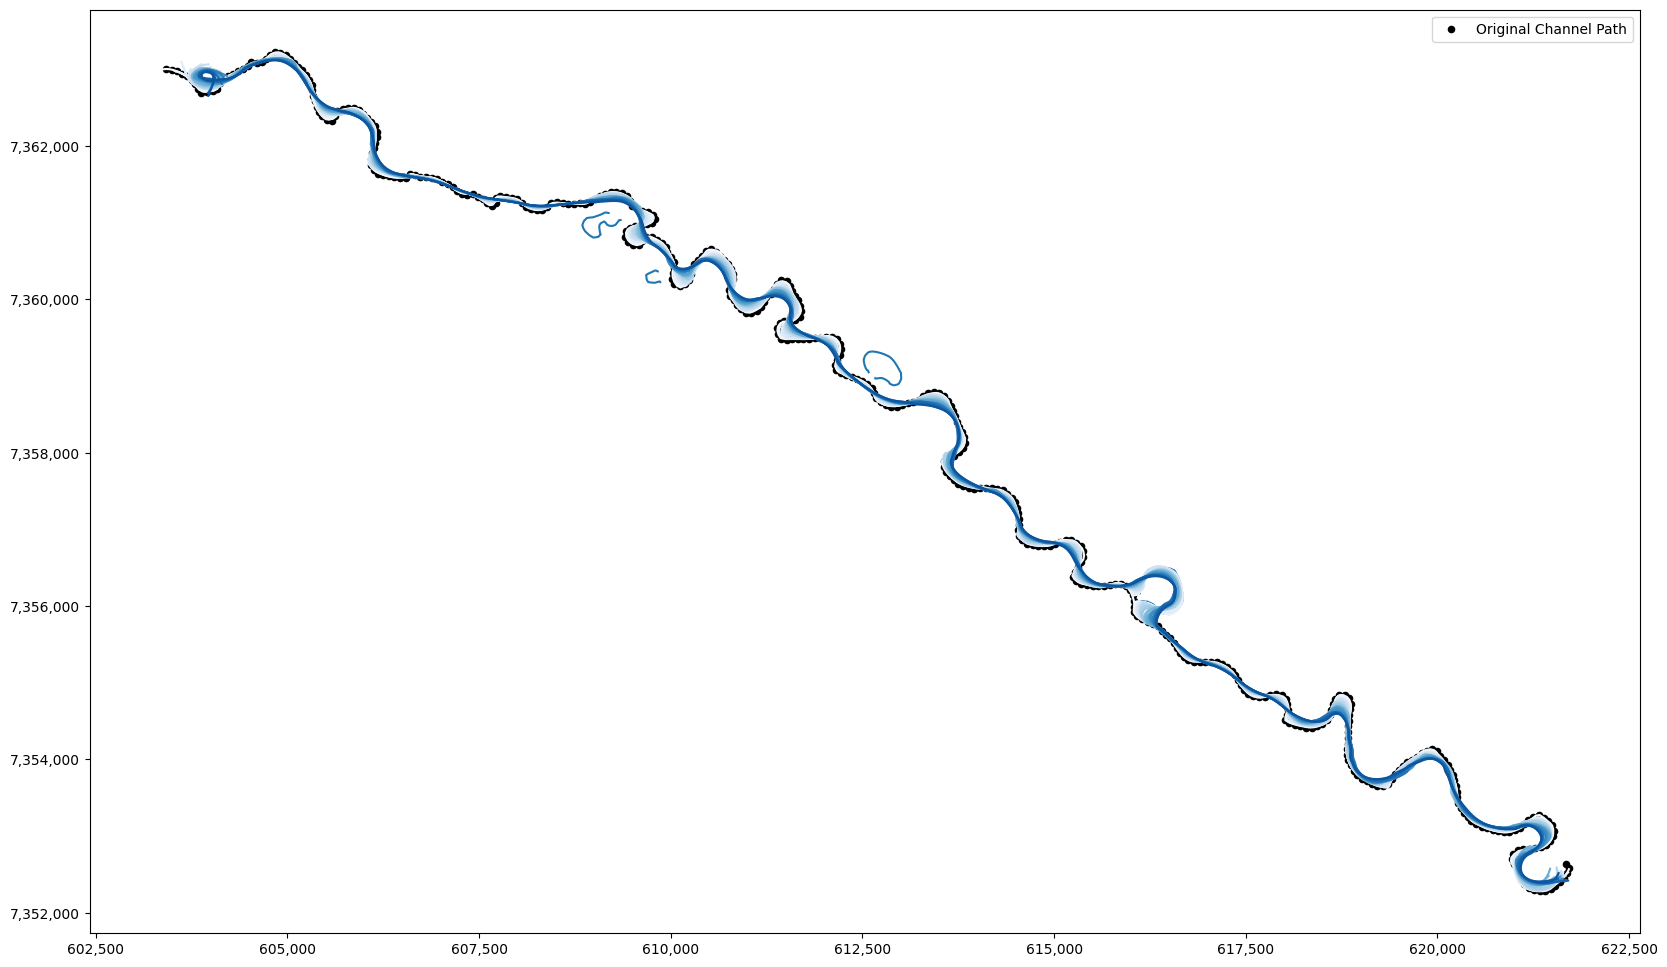

In [30]:
#ALGORITMI 
#REVERSE MIGRATION

import numpy as np
from shapely.geometry import Point

def reverse_migration_simulation(N_s, channel_path, p_before_next_inflectionpoint, oxbow):
    new_points = {}
    nurbs = {}
    nurbs_gdf = {}
    blacklist = []

    for sk in range(N_s):
        # Initialize a GeoDataFrame to store the new points
        new_points[sk] = gpd.GeoDataFrame(columns=['geometry', 'curvature', 'halfmeander'])
    
        # Inflection points of the current channel path
        inflection_points = define_inflectionpoints(channel_path['geometry'], p_before_next_inflectionpoint)
        # Define halfmeanders
        define_halfmeander(channel_path, inflection_points)
        # Add into new_points
        new_points[sk]['halfmeander'] = channel_path['halfmeander']
        
        radius, interp, sol, A, B = radius_and_intersectionpoint(channel_path)

        # Curvature
        calculate_curvature(channel_path, radius)
        # Add into new_points
        new_points[sk]['curvature'] = channel_path['curvature']
        
        # Define the Nhm number of half-meanders of the current channel path
        N_hm = len(inflection_points) - 1
        
        # Define the migration directions
        D_direction, L_direction = define_directions(inflection_points)

        '''Liikkumisen määrä näitä muuttamalla'''
        
        # Set mean and standard deviation for the Gaussian distribution
        mean_offset = 20
        std_dev_offset = 5

        # Sample horizontal and lateral offsets from Gaussian distribution

        '''Näitä muuttamalla: Pure lateral reverse migration, Pure reverse downstream migration, Mixed reverse migration, Natural reverse migration with probability distribution accepting negative offsets of lateral and downstream migration'''
    
        OD = np.random.normal(mean_offset, std_dev_offset, N_hm)
        #OD = np.zeros(N_hm)

        #OL = np.random.normal(mean_offset, std_dev_offset, N_hm)
        OL = np.zeros(N_hm)


        # Sample smoothing values sL and sD from a uniform distribution
        if np.all(OD) == 0:
            max_od = 0
        else:
            max_od = max(np.abs(OD))
        
        if np.all(OL) == 0:
            max_ld = 0
        else:
            max_ld = max(np.abs(OL))

        min_sD = 0
        max_sD = 2 * max_od

        min_sL = 0
        max_sL = 2 * max_ld

        sD = np.random.uniform(min_sD, max_sD, N_hm)
        sL = np.random.uniform(min_sL, max_sL, N_hm)
                            
        # Sample the weighting w
        w = np.random.choice([-1, 1], N_hm) 

        # Initialize a list to store the new points
        newpoint_list = []
        
        for hm in range(N_hm): 
            
            # Filter points of one halfmeander
            pm = (channel_path['halfmeander'] == hm)
            filtered_pm = channel_path[pm]

            mig_D, mig_L = offsets(filtered_pm, OD[hm], OL[hm], sD[hm], sL[hm], w[hm])

            '''
            print(OL)
            print("liikkuu metreissä D-suuntaan :", mig_D)
            print("liikkuu metreissä L-suuntaan :", mig_L)
        
            print("pisteet:", filtered_pm['geometry'])
            print("D-suunta: " , D_direction[hm])
            print("L-suunta: " , L_direction[hm] )
            '''

            #Move points

            for pn in range(len(filtered_pm['geometry'])):

                if hm % 2 == 0: 

                    new_point = (
                        filtered_pm['geometry'].iloc[pn].x + ((mig_D[pn] * -D_direction[hm][0]) + (mig_L[pn] *  L_direction[hm][0])) ,
                        filtered_pm['geometry'].iloc[pn].y + ((mig_D[pn] * -D_direction[hm][1]) + (mig_L[pn] *  L_direction[hm][1]))
                        )
                else:
                    new_point = (
                        filtered_pm['geometry'].iloc[pn].x + ((mig_D[pn] * -D_direction[hm][0]) + (mig_L[pn] *  -L_direction[hm][0])) ,
                        filtered_pm['geometry'].iloc[pn].y + ((mig_D[pn] * -D_direction[hm][1]) + (mig_L[pn] *  -L_direction[hm][1]))
                        )
                
                
                if any(math.isnan(coord) for coord in new_point):
                    new_point = (filtered_pm['geometry'].iloc[pn].x ,  filtered_pm['geometry'].iloc[pn].y)
                    newpoint_list.append(Point(new_point)) 

                else:
                    newpoint_list.append(Point(new_point))

        # Add new points to the GeoDataFrame
        new_points[sk]['geometry'] = newpoint_list

        # NURBS line of new points
        nurbs[sk], nurbs_gdf[sk] = create_nurbs((new_points[sk]['geometry']).apply(lambda point: (point.x, point.y)).tolist())

        # update new path to next round
        channel_path = create_breakpoints(nurbs[sk], 75)
        
        #print("ennenn", channel_path)'
        oxbow_find_nearest_points_sindex(oxbow, nurbs_gdf[sk])
        
        #INTEGRAAAATIO
        for i in range(len(oxbow['age'])):

            if oxbow['age'].iloc[i] < 1000 and oxbow['geometry'].iloc[i] not in blacklist:

                blacklist.append(oxbow['geometry'].iloc[i])
                
                #update nearest points
                oxbow_find_nearest_points_sindex(oxbow, nurbs_gdf[sk])
                print("round", sk)
                print(nurbs_gdf[sk])
                newpath_multiline, newpath_array = combine_segments(nurbs_gdf[sk], oxbow, 100)
                

                #print("NEWPATH ARRAY", newpath_array)

                channel_path = create_breakpoints(LineString(newpath_array), 75)
                #print("uus", channel_path)

                oxbow['age'] = oxbow['age'] - 100

            else:

                oxbow['age'] = oxbow['age'] - 100

            
        print(oxbow)
    #print(uudet_pisteet)   

        
    #kuvakoko
    fig, ax = plt.subplots(figsize=(20, 15))

        # x ja y akselit
    def format_eastings(value, pos):
        return f'{int(value):,}'

    def format_northings(value, pos):
            return f'{int(value):,}'

    ax.xaxis.set_major_formatter(FuncFormatter(format_eastings))
    ax.yaxis.set_major_formatter(FuncFormatter(format_northings))

    # Juoluoiden plottaus
    juoluat.plot(ax=ax)
        

    # Plot the original channel_path
    pisteet100.plot(ax=ax, color='black', label='Original Channel Path', markersize = 20)
    #channel_path.plot(ax=ax, cmap='jet', markersize=8)
    
    # Plot the moved points on the same axis
    #for i in range (len(new_points)):
    #    new_points[i].plot(ax=ax, color=f'C{i}', label=f'Moved Points (Round {i+1})', markersize = 20)

    # Plot the moved points on the same axis
    for i in range (len(new_points)):
        gradient = np.linspace(0, 1, len(new_points)+5)
        color = plt.cm.Blues(gradient[i])
        # Plottaa NURBS-viiva
        gpd.GeoDataFrame(geometry=[nurbs[i]]).plot(ax=ax, color=color)


    #plt.title(f'Round {sk + 1}: Channel Path and Moved Points')
    plt.legend()


    plt.show()

      
# Input
N_r = 1
N_s = 30

channel_path = pisteet100
p_before_next_inflectionpoint = 5
oxbow = juoluat

reverse_migration_simulation(N_s, channel_path, p_before_next_inflectionpoint, oxbow)

#TOIMII JOS AJAA MONTA KERTAAAA MUTTA TÄLLÖIN AGET MENEE VÄÄRIN. VIKAAAA COMBINE KOHDASSA


